[참고캐글커널](https://www.kaggle.com/davids1992/speech-representation-and-data-exploration)

In [1]:
import os
from os.path import isdir, join
from pathlib import Path
import pandas as pd

# math
import numpy as np
from scipy.fftpack import fft
from scipy import signal
from scipy.io import wavfile
import librosa
from sklearn.decomposition import PCA

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import IPython.display as ipd
import librosa.display

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import pandas as pd

%matplotlib inline

압축 해제([참고](https://qlsenddl-lab.tistory.com/29))

In [6]:
#!tar zxvf ./speech_commands_v0.01.tar.gz

## Sampling

In [2]:
#from scipy.io import wavfile 
train_audio_path = '../DSP study/tensorflow-speech-recognition-challenge/train/audio/'
filename = 'yes/0a7c2a8d_nohash_0.wav'

In [3]:
sample_rate, samples = wavfile.read(str(train_audio_path)+filename)

In [4]:
print('sample rate: {}, samples.shape: {}'.format(sample_rate, samples.shape))

sample rate: 16000, samples.shape: (16000,)


sample rate(=sample frequency)가 16000Hz일 때 sample 수가 16000개이므로, 이 음성 파일은 1초라는 걸 간접적으로 알 수 있음

## Visualization

음성은 시간, 주파수, 진폭(amplitud)으로 이루어져 있으므로 단순하게 spectrum 그래프를 그리면 이 세가지 요소를 동시에 살펴보기 어렵다.
그래서 신호의 spectral content의 시간 변위를 표시하는 시간, 주파수에 대한 2차 함수인 Spectrogram을 계산해야 한다.

In [5]:
def log_specgram(audio, sample_rate, window_size=20, step_size=10, eps=1e-10):
    # nperseg : Length of each segment
    # noverlap : Number of points to overlap between segments
    nperseg = int(round(window_size * sample_rate / 1e3))
    noverlap = int(round(step_size * sampled_rate / 1e3))
    freqs, times, spec = signal.spectrogram(audio, fs=sample_rate, 
                                           window='hann',nperseg=nperseg,
                                           noverlap=noverlap, detrend=False)
    return freqs, times, np.lot(spec.T.astype(np.float32) + eps)

In [ ]:
# Amplitude, Spectrogram plot
freqs, times, spectrogram = log_specgram(samples, sample_rate)
fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(211)

/Users/jaeyoungshin/opt/anaconda3/lib/python3.8/site-packages/librosa/display.py:656: FutureWarning:

Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.



Text(0.5, 1.0, 'Spectrogram (dB)')

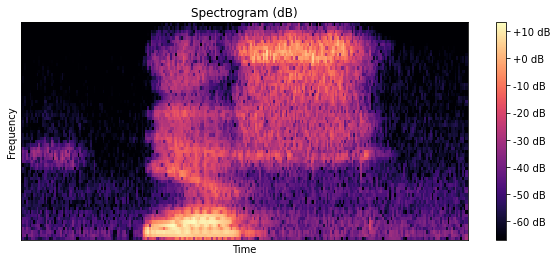

In [35]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt 
train_audio_path = './tensorflow-speech-recognition-challenge/train/audio/'
filename = 'yes/0a7c2a8d_nohash_0.wav'
x = librosa.load(f'{train_audio_path+filename}',16000)[0]
y = librosa.stft(x, n_fft=128, hop_length=64, win_length=128)

magnitude = np.abs(y)
log_spectrogram = librosa.amplitude_to_db(magnitude)

plt.figure(figsize=(10,4))
librosa.display.specshow(log_spectrogram, sr=16000, hop_length=64)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format='%+2.0f dB')
plt.title("Spectrogram (dB)")

In [42]:
x.shape

(16000,)

In [41]:
y.shape

(65, 251)

In [48]:
len(librosa.load(f'{train_audio_path+filename}',16000))

2